In [350]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [351]:
mat = sio.loadmat('Annotations/Annotations.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test', 'train', 'val'])

In [352]:
train = pd.DataFrame(mat['train'][0])
test = pd.DataFrame(mat['test'][0])
validation = pd.DataFrame(mat['val'][0])
train.columns

Index(['filename', 'folder', 'image_size', 'original_database', 'person'], dtype='object')

In [353]:
train['folder'] = train.apply(lambda x: x['folder'][0], axis=1)
train['filename'] = train.apply(lambda x: x['filename'][0], axis=1)
df = pd.concat([train['folder'], train['filename']], axis=1)
paths = df.apply(lambda x: "./emotic/" +os.path.join(x['folder'], x['filename']), axis=1)

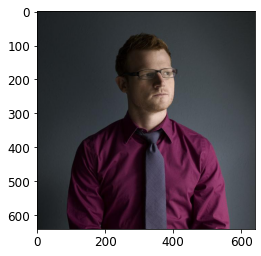

In [354]:
paths.shape
plt.imshow(plt.imread(paths[0]))

In [355]:
print(train['person'][2][0][0][1][0][0][0][0].tolist())

[array(['Engagement'], dtype='<U10'), array(['Excitement'], dtype='<U10'), array(['Happiness'], dtype='<U9')]


In [356]:
print(train['person'][3][0][0][1][0][0][0][0][0][0])

Aversion


In [357]:
train['bbox'] = train.apply(lambda x: x['person'][0][0][0][0], axis=1)
train['paths'] = paths
train['discrete_emotion'] = train.apply(lambda x: [x['person'][0][0][1][0][0][0][0][0][0]] if (len(x['person'][0][0][1][0][0][0][0]) == 1) else [x['person'][0][0][1][0][0][0][0][0][0], x['person'][0][0][1][0][0][0][0][1][0]] if (len(x['person'][0][0][1][0][0][0][0]) == 2) else [x['person'][0][0][1][0][0][0][0][0][0], x['person'][0][0][1][0][0][0][0][1][0], x['person'][0][0][1][0][0][0][0][2][0]] , axis=1)
train['continous_emotion'] = train.apply(lambda x: [x['person'][0][0][2][0][0][0][0][0], x['person'][0][0][2][0][0][1][0][0], x['person'][0][0][2][0][0][2][0][0]], axis=1)

In [358]:
train.drop(columns = {"filename", "folder", "image_size", "original_database", "person"}, axis=1, inplace=True)

In [359]:
print(type(train['continous_emotion'][279][0]) == np.float64)
# drop all rows where any of the emotions is NaN
train = train[~train['continous_emotion'].apply(lambda x: np.isnan(x).any())]
train = train[~train['bbox'].apply(lambda x: np.isnan(x).any())]
# convert all bbox to int
train['bbox'] = train['bbox'].apply(lambda x: x.astype(int))


True


In [360]:
train.dropna()

,bbox,paths,discrete_emotion,continous_emotion
0,"[86, 58, 564, 628]",./emotic/mscoco/images/COCO_val2014_0000005622...,"[Disconnection, Doubt/Confusion]","[5, 3, 9]"
1,"[485, 149, 605, 473]",./emotic/mscoco/images/COCO_train2014_00000028...,[Anticipation],"[6, 4, 7]"
2,"[305, 92, 461, 465]",./emotic/mscoco/images/COCO_val2014_0000005581...,"[Engagement, Excitement, Happiness]","[7, 8, 8]"
3,"[221, 63, 448, 372]",./emotic/mscoco/images/COCO_train2014_00000036...,"[Aversion, Pleasure]","[8, 9, 8]"
4,"[44, 143, 150, 288]",./emotic/mscoco/images/COCO_train2014_00000021...,"[Confidence, Excitement]","[7, 9, 10]"
...,...,...,...,...
17072,"[189, 194, 323, 438]",./emotic/mscoco/images/COCO_val2014_0000002037...,"[Anticipation, Engagement]","[6, 5, 3]"
17073,"[214, 48, 340, 326]",./emotic/mscoco/images/COCO_train2014_00000017...,[Confidence],"[7, 8, 7]"
17074,"[166, 35, 341, 401]",./emotic/mscoco/images/COCO_val2014_0000005140...,"[Anticipation, Engagement, Excitement]","[6, 2, 10]"
17075,"[245, 227, 293, 340]",./emotic/framesdb/images/frame_k7fb824vh221kl3...,[Engagement],"[5, 5, 6]"


In [361]:
train

,bbox,paths,discrete_emotion,continous_emotion
0,"[86, 58, 564, 628]",./emotic/mscoco/images/COCO_val2014_0000005622...,"[Disconnection, Doubt/Confusion]","[5, 3, 9]"
1,"[485, 149, 605, 473]",./emotic/mscoco/images/COCO_train2014_00000028...,[Anticipation],"[6, 4, 7]"
2,"[305, 92, 461, 465]",./emotic/mscoco/images/COCO_val2014_0000005581...,"[Engagement, Excitement, Happiness]","[7, 8, 8]"
3,"[221, 63, 448, 372]",./emotic/mscoco/images/COCO_train2014_00000036...,"[Aversion, Pleasure]","[8, 9, 8]"
4,"[44, 143, 150, 288]",./emotic/mscoco/images/COCO_train2014_00000021...,"[Confidence, Excitement]","[7, 9, 10]"
...,...,...,...,...
17072,"[189, 194, 323, 438]",./emotic/mscoco/images/COCO_val2014_0000002037...,"[Anticipation, Engagement]","[6, 5, 3]"
17073,"[214, 48, 340, 326]",./emotic/mscoco/images/COCO_train2014_00000017...,[Confidence],"[7, 8, 7]"
17074,"[166, 35, 341, 401]",./emotic/mscoco/images/COCO_val2014_0000005140...,"[Anticipation, Engagement, Excitement]","[6, 2, 10]"
17075,"[245, 227, 293, 340]",./emotic/framesdb/images/frame_k7fb824vh221kl3...,[Engagement],"[5, 5, 6]"


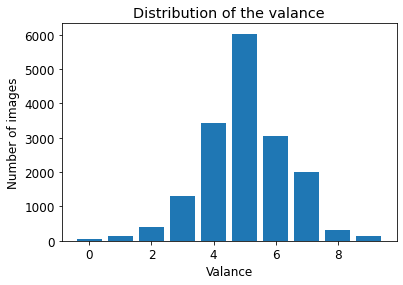

In [362]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][0]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)
plt.title('Distribution of the valance')
plt.xlabel('Valance')
plt.ylabel('Number of images')
plt.show()

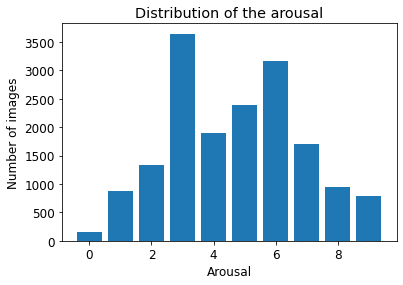

In [363]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][1]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)
# add title and labels
plt.title('Distribution of the arousal')
plt.xlabel('Arousal')
plt.ylabel('Number of images')
plt.show()

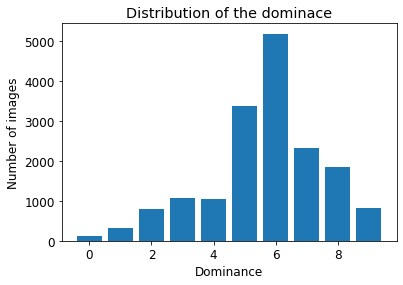

In [364]:
continous_emotion_valance = [0,0,0,0,0,0,0,0,0,0]
for row, emotion in train.iterrows():
        continous_emotion_valance[emotion['continous_emotion'][2]-1] += 1 
# plot the distribution of the emotions and label them
plt.bar(range(len(continous_emotion_valance)), continous_emotion_valance)
# add the labels and title 
plt.xlabel('Dominance')
plt.ylabel('Number of images')
plt.title('Distribution of the dominace')
plt.show()

In [365]:
discrete_emotions = {'Peace': 0, 'Affection': 0, 'Esteem': 0, 'Anticipation': 0, 'Engagement': 0, 'Confidence': 0, 'Happiness': 0, 'Pleasure': 0, 'Excitement': 0, 'Surprise': 0, 'Sympathy': 0, 'Doubt/Confusion': 0, 'Disconnection': 0, 'Fatigue': 0, 'Embarrassment': 0, 'Yearning': 0, 'Disapproval': 0,'Aversion': 0 ,'Annoyance': 0, 'Anger': 0, 'Sensitivity': 0, 'Sadness': 0, 'Disquietment': 0, 'Fear': 0, 'Pain': 0, 'Suffering': 0}
for i, row in train.iterrows():
    for j in range(len(row['discrete_emotion'])):
        discrete_emotions[row['discrete_emotion'][j]] += 1

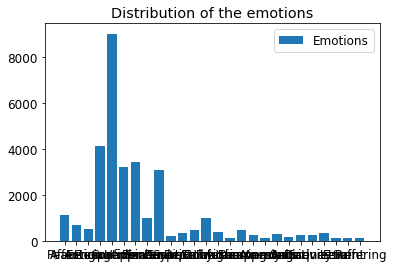

In [366]:
# plot the distribution of the emotions and label them
plt.bar(range(len(discrete_emotions)), discrete_emotions.values())
plt.xticks(range(len(discrete_emotions)), discrete_emotions.keys())
# make the plot look better, add a title and a legend
plt.title('Distribution of the emotions')
plt.legend(['Emotions'])
plt.show()
# make the font smaller
plt.rcParams['font.size'] = 12

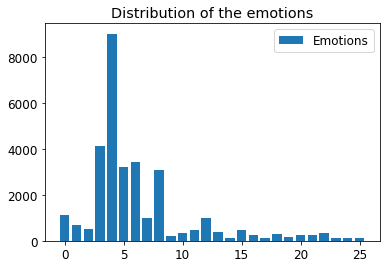

In [367]:
# plot the distribution of the emotions and label 
plt.bar(range(len(discrete_emotions)), discrete_emotions.values())
# label the x axis with integers
plt.title('Distribution of the emotions')
plt.legend(['Emotions'])
plt.show()


In [368]:
# separate continous emotions on to different columns
train['valance'] = train['continous_emotion'].apply(lambda x: x[0])
train['arousal'] = train['continous_emotion'].apply(lambda x: x[1])
train['dominance'] = train['continous_emotion'].apply(lambda x: x[2])
train.drop(columns = {"continous_emotion"}, axis=1, inplace=True)

In [369]:
# 1. Peace: well being and relaxed; no worry; having positive thoughts or sensations; satisfied.
# 2. Affection: fond feelings; love; tenderness
# 3. Esteem: feelings of favorable opinion or judgment; respect; admiration; gratefulness
# 4. Anticipation: state of looking forward; hoping on or getting prepared for possible future events
# 5. Engagement: paying attention to something; absorbed into something; curious; interested
# 6. Confidence: feeling of being certain; conviction that an outcome will be favorable; encouraged; proud
# 7. Happiness: feeling delighted; feeling enjoyment or amusement
# 8. Pleasure: feeling of delight in the senses
# 9. Excitement: feeling enthusiasm; stimulated; energetic
# 10. Surprise: sudden discovery of something unexpected
# 11. Sympathy: state of sharing others’ emotions, goals or troubles; supportive; compassionate
# 12. Doubt/Confusion: difficulty to understand or decide; thinking about different options
# 13. Disconnection: feeling not interested in the main event of the surrounding; indifferent; bored; distracted
# 14. Fatigue: weariness; tiredness; sleepy
# 15. Embarrassment: feeling ashamed or guilty
# 16. Yearning: strong desire to have something; jealous; envious; lust
# 17. Disapproval: feeling that something is wrong or reprehensible; contempt; hostile
# 18. Aversion: feeling disgust, dislike, repulsion; feeling hate
# 19. Annoyance: bothered by something or someone; irritated; impatient; frustrated
# 20. Anger: intense displeasure or rage; furious; resentful
# 21. Sensitivity: feeling of being physically or emotionally wounded; feeling delicate or vulnerable
# 22. Sadness: feeling unhappy, sorrow, disappointed, or discouraged
# 23. Disquietment: nervous; worried; upset; anxious; tense; pressured; alarmed
# 24. Fear: feeling suspicious or afraid of danger, threat, evil or pain; horror
# 25. Pain: physical suffering
# 26. Suffering: psychological or emotional pain; distressed; anguished
# make dictionary of emotions and label them as 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
emotions = {'Peace': 0, 'Affection': 1, 'Esteem': 2, 'Anticipation': 3, 'Engagement': 4, 'Confidence': 5, 'Happiness': 6, 'Pleasure': 7, 'Excitement': 8, 'Surprise': 9, 'Sympathy': 10, 'Doubt/Confusion': 11, 'Disconnection': 12, 'Fatigue': 13, 'Embarrassment': 14, 'Yearning': 15, 'Disapproval': 16, 'Aversion': 17, 'Annoyance': 18, 'Anger': 19, 'Sensitivity': 20, 'Sadness': 21, 'Disquietment': 22, 'Fear': 23, 'Pain': 24, 'Suffering': 25}
# make a new column in the dataframe for the emotions and map the emotions to the values
train['first_emotion'] = train['discrete_emotion'].apply(lambda x: emotions[x[0]])

In [370]:
import pickle
with open('train.pkl', 'wb') as f:
    pickle.dump(train, f)

In [371]:
train

,bbox,paths,discrete_emotion,valance,arousal,dominance,first_emotion
0,"[86, 58, 564, 628]",./emotic/mscoco/images/COCO_val2014_0000005622...,"[Disconnection, Doubt/Confusion]",5,3,9,12
1,"[485, 149, 605, 473]",./emotic/mscoco/images/COCO_train2014_00000028...,[Anticipation],6,4,7,3
2,"[305, 92, 461, 465]",./emotic/mscoco/images/COCO_val2014_0000005581...,"[Engagement, Excitement, Happiness]",7,8,8,4
3,"[221, 63, 448, 372]",./emotic/mscoco/images/COCO_train2014_00000036...,"[Aversion, Pleasure]",8,9,8,17
4,"[44, 143, 150, 288]",./emotic/mscoco/images/COCO_train2014_00000021...,"[Confidence, Excitement]",7,9,10,5
...,...,...,...,...,...,...,...
17072,"[189, 194, 323, 438]",./emotic/mscoco/images/COCO_val2014_0000002037...,"[Anticipation, Engagement]",6,5,3,3
17073,"[214, 48, 340, 326]",./emotic/mscoco/images/COCO_train2014_00000017...,[Confidence],7,8,7,5
17074,"[166, 35, 341, 401]",./emotic/mscoco/images/COCO_val2014_0000005140...,"[Anticipation, Engagement, Excitement]",6,2,10,3
17075,"[245, 227, 293, 340]",./emotic/framesdb/images/frame_k7fb824vh221kl3...,[Engagement],5,5,6,4
